# __Signatures Verification__


## __Contents:__
> 1. Overview
> 2. Laibraries
> 3. Read the dataset
> 4. Pre-processing
> 5. Models
>> 1. Vgg-16 
>> 2. ResNet
>> 3. InceptionV3
>> 3. Xception
> 6. Classification
> 7. Visualization

---


## __Overview:__

In this project we take the dataset from kaggle [here](https://www.kaggle.com/eryash15/re-arranged-data)


---

## __Laibraries:__

In [140]:
# %pip install tensorflow
# !pip install keras-tuner --upgrade

In [93]:
#Import Libraries
import numpy as np
import pandas as pd
import os
import cv2
import glob

# Functions to load the CNN model
# import signet
# from cnn_model import CNNModel

# Functions for plotting:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
plt.rcParams['image.cmap'] = 'Greys'

import tensorflow as tf
import tensorflow.keras
import keras_tuner as kt

from tensorflow.keras import models, layers
from tensorflow.keras.models import Model, model_from_json, Sequential

import keras.applications.resnet
from keras.applications.resnet import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, SeparableConv2D, UpSampling2D, BatchNormalization, Input, GlobalAveragePooling2D

from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import applications
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras import applications
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras import backend as K
import gc
from tensorflow.keras.models import Model
import pickle
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix



## <hr>

## __Read the Dataset path:__

In [6]:
train_df = pd.read_csv('data/sign_data/train_data.csv')
test_df = pd.read_csv('data/sign_data/test_data.csv')

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23206 entries, 0 to 23205
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   img1    23206 non-null  object
 1   img2    23206 non-null  object
 2   target  23206 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 544.0+ KB


In [7]:
train_dir="data/sign_data/Dataset/train"
test_dir="data/sign_data/Dataset/test"

## <hr>

## __Pre-processing:__

- In this section we get the data images, names and labels from path and do some pre-processing techniques for images (resize, convert to RGB, normalize).

In [8]:
train_data_names = []
test_data_names = []

train_data = []
train_labels = []

SIZE = 224

for per in os.listdir(train_dir):
    for data in glob.glob(train_dir+'/'+per+'/*.*'):
        
        train_data_names.append(data)
        img = cv2.imread(data)
        # to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # resize img
        img = cv2.resize(img, (SIZE,SIZE))
        # normalize img from 0-255 to 0-1
        img = img/255.0
        
        train_data.append([img])
        if per[-1]=='g':
            train_labels.append(np.array(1))
        else:
            train_labels.append(np.array(0))

train_data = np.array(train_data)
train_labels = np.array(train_labels)

#Test Data

test_data = []
test_labels = []

for per in os.listdir(test_dir):
    for data in glob.glob(test_dir+'/'+per+'/*.*'):
        test_data_names.append(data)
        img = cv2.imread(data)
        # to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # resize img
        img = cv2.resize(img, (SIZE,SIZE))
        # normalize img from 0-255 to 0-1
        img = img/255.0

        test_data.append([img])
        if per[-1]=='g':
            test_labels.append(np.array(1))
        else:
            test_labels.append(np.array(0))

test_data = np.array(test_data)
test_labels = np.array(test_labels)

In [9]:
train_labels[83]

0

In [10]:
test_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,

In [11]:
train_data.shape

(1649, 1, 224, 224, 3)

In [12]:
# Categorical labels
#print(train_labels)
train_labels = to_categorical(train_labels)
#print(train_data.shape)
# Reshaping
train_data = train_data.reshape(-1, SIZE,SIZE, 3)
test_data = test_data.reshape(-1, SIZE,SIZE, 3)

In [13]:
train_data.shape

(1649, 224, 224, 3)

## <hr>

## __Models:__

In [16]:
input_ = (224,224,3)
EPOCHS = 20
BS = 64
output_ = 2

### __Freezing layers of models:__

In [ ]:
df_result = pd.DataFrame(columns=['model','optimizer','epochs','tr_accu','val_accu','tr_loss','val_loss'])

#### __VGG16:__

In [ ]:
## Loading VGG16 model
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=input_)
base_model.trainable = False ## Not trainable weights
data_augmentation = Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])


##### __VGG16 + Adam:__

In [17]:
flatten_layer = layers.Flatten()
input_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dense(200, activation='relu')
output_layer = layers.Dense(2, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    input_1,
    dense_layer_2,
    output_layer
])

model.compile(
    optimizer=optimizers.Adam(lr=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
 
model.summary()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=3,  restore_best_weights=True)

vgg16_adam= model.fit(train_data, train_labels, epochs=20, validation_split=0.25, batch_size=BS, callbacks=[es])

acc = vgg16_adam.history['accuracy']
val_acc = vgg16_adam.history['val_accuracy']
loss = vgg16_adam.history['loss']
val_loss = vgg16_adam.history['val_loss']
epochs = range(len(acc))

df_result.append(pd.DataFrame({'model':'vgg16','optimizer': 'adam', 'epochs': epochs,'tr_accu': acc,'val_accu': val_acc,'tr_loss': loss,'val_loss': val_loss}))

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 200)               51400     
                                                                 
 dense_2 (Dense)             (None, 2)                 402       
                                                                 
Total params: 21,189,274
Trainable params: 6,474,586
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/20
20/20 [================

,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,vgg16,adam,0,0.550162,0.506053,0.767247,0.683573
1,vgg16,adam,1,0.613269,0.506053,0.659116,0.685625
2,vgg16,adam,2,0.620550,0.721550,0.658077,0.618821
3,vgg16,adam,3,0.662621,0.476998,0.627856,0.763229
4,vgg16,adam,4,0.678803,0.576271,0.616130,0.654051
5,vgg16,adam,5,0.656958,0.673123,0.623895,0.595089


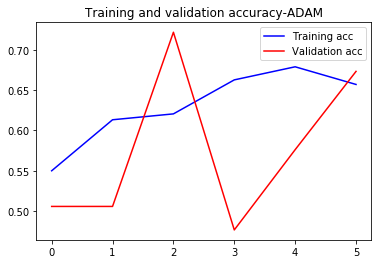

<Figure size 432x288 with 0 Axes>

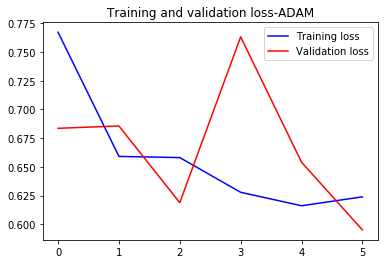

In [18]:


plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy-ADAM')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss-ADAM')
plt.legend()
plt.show()

##### __VGG16 + SGD:__

In [19]:
flatten_layer = layers.Flatten()
input_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dense(200, activation='relu')
output_layer = layers.Dense(2, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    input_1,
    dense_layer_2,
    output_layer
])

model.compile(
    optimizer=optimizers.SGD(lr=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
 


es = EarlyStopping(monitor='val_accuracy', mode='max', patience=3,verbose=1,  restore_best_weights=True)

vgg16_sgd= model.fit(train_data, train_labels, epochs=20, validation_split=0.25, batch_size=BS, callbacks=[es])

acc = vgg16_sgd.history['accuracy']
val_acc = vgg16_sgd.history['val_accuracy']
loss = vgg16_sgd.history['loss']
val_loss = vgg16_sgd.history['val_loss']
epochs = range(len(acc))

df_result.append(pd.DataFrame({'model':'vgg16','optimizer': 'sgd', 'epochs': epochs,'tr_accu': acc,'val_accu': val_acc,'tr_loss': loss,'val_loss': val_loss}))

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
20/20 [==============================] - 475s 24s/step - loss: 0.6882 - accuracy: 0.5744 - val_loss: 0.7767 - val_accuracy: 0.4383
Epoch 2/20
20/20 [==============================] - 472s 24s/step - loss: 0.6960 - accuracy: 0.5372 - val_loss: 0.8548 - val_accuracy: 0.4383
Epoch 3/20
20/20 [==============================] - 1194s 62s/step - loss: 0.6996 - accuracy: 0.5485 - val_loss: 0.8862 - val_accuracy: 0.4383
Epoch 4/20
20/20 [==============================] - 492s 25s/step - loss: 0.6888 - accuracy: 0.5785 - val_loss: 0.7715 - val_accuracy: 0.4383
Epoch 00004: early stopping


,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,vgg16,sgd,0,0.574434,0.438257,0.688161,0.776745
1,vgg16,sgd,1,0.537217,0.438257,0.695984,0.854798
2,vgg16,sgd,2,0.548544,0.438257,0.699596,0.886175
3,vgg16,sgd,3,0.578479,0.438257,0.688769,0.771475


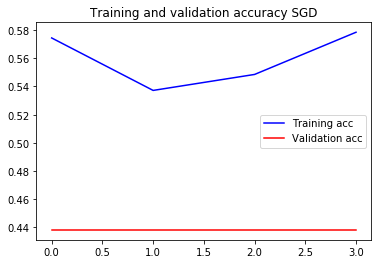

<Figure size 432x288 with 0 Axes>

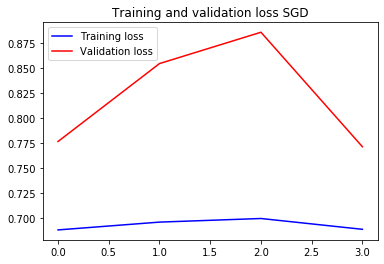

In [20]:

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy SGD')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss SGD')
plt.legend()
plt.show()

##### __VGG16 + RMSProp:__

In [21]:
flatten_layer = layers.Flatten()
input_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dense(200, activation='relu')
output_layer = layers.Dense(2, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    input_1,
    dense_layer_2,
    output_layer
])



model.compile(
    optimizer=optimizers.RMSprop(lr=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)
 
model.summary()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=3,  restore_best_weights=True)

vgg16_RMSprop= model.fit(train_data, train_labels, epochs=20, validation_split=0.25, batch_size=BS, callbacks=[es])

acc = vgg16_RMSprop.history['accuracy']
val_acc = vgg16_RMSprop.history['val_accuracy']
loss = vgg16_RMSprop.history['loss']
val_loss = vgg16_RMSprop.history['val_loss']
epochs = range(len(acc))

df_result.append(pd.DataFrame({'model':'vgg16','optimizer': 'RMSprop', 'epochs': epochs,'tr_accu': acc,'val_accu': val_acc,'tr_loss': loss,'val_loss': val_loss}))

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               6422784   
                                                                 
 dense_7 (Dense)             (None, 200)               51400     
                                                                 
 dense_8 (Dense)             (None, 2)                 402       
                                                                 
Total params: 21,189,274
Trainable params: 6,474,586
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/20
20/20 [================

,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,vgg16,RMSprop,0,0.572006,0.537530,0.692392,0.683419
1,vgg16,RMSprop,1,0.607605,0.653753,0.666134,0.657244
2,vgg16,RMSprop,2,0.610841,0.464891,0.665398,0.700570
3,vgg16,RMSprop,3,0.634304,0.687651,0.655734,0.643472
4,vgg16,RMSprop,4,0.610032,0.581114,0.651872,0.659920
5,vgg16,RMSprop,5,0.636731,0.445521,0.652085,0.792449
6,vgg16,RMSprop,6,0.639968,0.644068,0.646461,0.630712


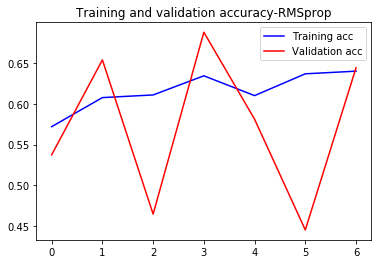

<Figure size 432x288 with 0 Axes>

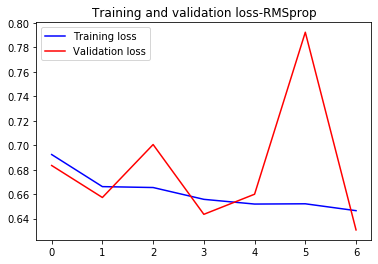

In [22]:

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy-RMSprop')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss-RMSprop')
plt.legend()
plt.show()

##### __VGG16 + Adagrad:__

In [23]:
flatten_layer = layers.Flatten()
input_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dense(200, activation='relu')
output_layer = layers.Dense(2, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    input_1,
    dense_layer_2,
    output_layer
])


model.compile(
    optimizer=optimizers.Adagrad(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
 
model.summary()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

vgg16_Adagrad= model.fit(train_data, train_labels, epochs=20, validation_split=0.25, batch_size=BS, callbacks=[es])

acc = vgg16_Adagrad.history['accuracy']
val_acc = vgg16_Adagrad.history['val_accuracy']
loss = vgg16_Adagrad.history['loss']
val_loss = vgg16_Adagrad.history['val_loss']
epochs = range(len(acc)) 

df_result.append(pd.DataFrame({'model':'vgg16','optimizer': 'Adagrad', 'epochs': epochs,'tr_accu': acc,'val_accu': val_acc,'tr_loss': loss,'val_loss': val_loss}))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_9 (Dense)             (None, 256)               6422784   
                                                                 
 dense_10 (Dense)            (None, 200)               51400     
                                                                 
 dense_11 (Dense)            (None, 2)                 402       
                                                                 
Total params: 21,189,274
Trainable params: 6,474,586
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/20
20/20 [================

,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,vgg16,Adagrad,0,0.516181,0.438257,0.714975,0.725494
1,vgg16,Adagrad,1,0.572006,0.714286,0.681500,0.675234
2,vgg16,Adagrad,2,0.590615,0.561743,0.683741,0.666838
3,vgg16,Adagrad,3,0.580097,0.438257,0.674588,0.758979
4,vgg16,Adagrad,4,0.607605,0.438257,0.673309,0.762532
5,vgg16,Adagrad,5,0.584142,0.438257,0.668827,0.781976
6,vgg16,Adagrad,6,0.610032,0.443099,0.664667,0.699842


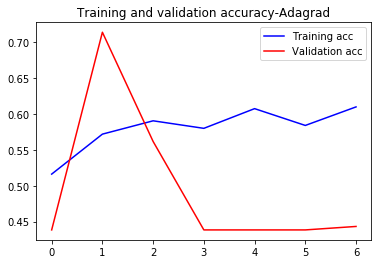

<Figure size 432x288 with 0 Axes>

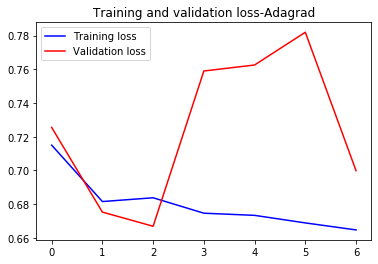

In [24]:

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy-Adagrad')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss-Adagrad')
plt.legend()
plt.show() 

In [36]:
# store vgg16 results

# add adam results
epochs = range(len(vgg16_adam.history['accuracy']))

for row in epochs:
    df_result.loc[len(df_result.index)] = ['vgg16', 'Adam', epochs[row], vgg16_adam.history['accuracy'][row], vgg16_adam.history['val_accuracy'][row], 
vgg16_adam.history['loss'][row], vgg16_adam.history['val_loss'][row]]

# add sgd results
epochs = range(len(vgg16_sgd.history['accuracy'])) 

for row in epochs:
    df_result.loc[len(df_result.index)] = ['vgg16', 'Sgd', epochs[row], vgg16_sgd.history['accuracy'][row], vgg16_sgd.history['val_accuracy'][row], 
vgg16_sgd.history['loss'][row], vgg16_sgd.history['val_loss'][row]]


# add RMSprop results
epochs = range(len(vgg16_RMSprop.history['accuracy'])) 

for row in epochs:
    df_result.loc[len(df_result.index)] = ['vgg16', 'RMSprop', epochs[row], vgg16_RMSprop.history['accuracy'][row], vgg16_RMSprop.history['val_accuracy'][row], 
vgg16_RMSprop.history['loss'][row], vgg16_RMSprop.history['val_loss'][row]]


# add Adagrad results
epochs = range(len(vgg16_Adagrad.history['accuracy'])) 

for row in epochs:
    df_result.loc[len(df_result.index)] = ['vgg16', 'Adagrad', epochs[row], vgg16_Adagrad.history['accuracy'][row], vgg16_Adagrad.history['val_accuracy'][row], 
vgg16_Adagrad.history['loss'][row], vgg16_Adagrad.history['val_loss'][row]]

df_result

,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,vgg16,Adagrad,0,0.516181,0.438257,0.714975,0.725494
1,vgg16,Adagrad,1,0.572006,0.714286,0.681500,0.675234
2,vgg16,Adagrad,2,0.590615,0.561743,0.683741,0.666838
3,vgg16,Adagrad,3,0.580097,0.438257,0.674588,0.758979
4,vgg16,Adagrad,4,0.607605,0.438257,0.673309,0.762532
5,vgg16,Adagrad,5,0.584142,0.438257,0.668827,0.781976
6,vgg16,Adagrad,6,0.610032,0.443099,0.664667,0.699842
7,vgg16,Adam,0,0.550162,0.506053,0.767247,0.683573
8,vgg16,Adam,1,0.613269,0.506053,0.659116,0.685625
9,vgg16,Adam,2,0.620550,0.721550,0.658077,0.618821


#### __ResNet:__

In [50]:
# initializing model
pretrained_model= applications.ResNet50(include_top=False,
                   input_shape=input_,
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
data_augmentation = Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])


##### __ResNet + Adam:__

In [51]:
# add custum layers
resnet_model = Sequential()
resnet_model.add(pretrained_model)
resnet_model.add(Flatten(input_shape=pretrained_model.output_shape[1:]))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(20, activation='relu'))
resnet_model.add(Dense(output_, activation='softmax'))

# display the summary  of the model

resnet_model.summary()

# Compiling Model

resnet_model.compile(optimizer=Adam(learning_rate=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                   
                              verbose=1)
                              
early_stop=[earlyStopping]

# Fit the Model

resnet_adam = resnet_model.fit(train_data,train_labels, batch_size=64,epochs=20, callbacks=early_stop, validation_split=.25)

acc = resnet_adam.history['accuracy']
val_acc = resnet_adam.history['val_accuracy']
loss = resnet_adam.history['loss']
val_loss = resnet_adam.history['val_loss']
epochs = range(len(acc)) 

df_result.append(pd.DataFrame({'model':'ResNet','optimizer': 'adam', 'epochs': epochs,'tr_accu': acc,'val_accu': val_acc,'tr_loss': loss,'val_loss': val_loss}))

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_8 (Flatten)         (None, 2048)              0         
                                                                 
 dense_24 (Dense)            (None, 256)               524544    
                                                                 
 dense_25 (Dense)            (None, 20)                5140      
                                                                 
 dense_26 (Dense)            (None, 2)                 42        
                                                                 
Total params: 24,117,438
Trainable params: 529,726
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/20
20/20 [=================

,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,vgg16,Adagrad,0,0.516181,0.438257,0.714975,0.725494
1,vgg16,Adagrad,1,0.572006,0.714286,0.681500,0.675234
2,vgg16,Adagrad,2,0.590615,0.561743,0.683741,0.666838
3,vgg16,Adagrad,3,0.580097,0.438257,0.674588,0.758979
4,vgg16,Adagrad,4,0.607605,0.438257,0.673309,0.762532
5,vgg16,Adagrad,5,0.584142,0.438257,0.668827,0.781976
6,vgg16,Adagrad,6,0.610032,0.443099,0.664667,0.699842
7,vgg16,Adam,0,0.550162,0.506053,0.767247,0.683573
8,vgg16,Adam,1,0.613269,0.506053,0.659116,0.685625
9,vgg16,Adam,2,0.620550,0.721550,0.658077,0.618821


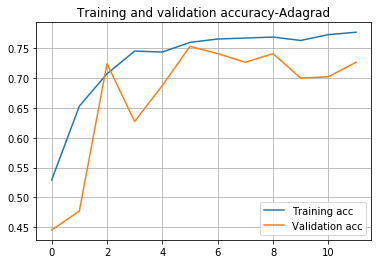

<Figure size 432x288 with 0 Axes>

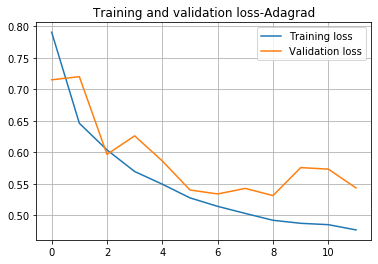

In [52]:
# plot result
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy-Adagrad')
plt.legend()
plt.grid()
plt.figure()
plt.show()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss-Adagrad')
plt.grid()
plt.legend()
plt.show() 

##### __ResNet + Sgd:__

In [53]:
# add custum layers
resnet_model = Sequential()
resnet_model.add(pretrained_model)
resnet_model.add(Flatten(input_shape=pretrained_model.output_shape[1:]))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(20, activation='relu'))
resnet_model.add(Dense(output_, activation='softmax'))

resnet_model.compile(optimizer=optimizers.SGD(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

resnet_model.summary()


earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)
                              
early_stop=[earlyStopping]

resnet_sgd = resnet_model.fit(train_data,train_labels, batch_size=64, epochs=20, callbacks=early_stop, validation_split=.25)


acc = resnet_sgd.history['accuracy']
val_acc = resnet_sgd.history['val_accuracy']
loss = resnet_sgd.history['loss']
val_loss = resnet_sgd.history['val_loss']
epochs = range(len(acc)) 

df_result.append(pd.DataFrame({'model':'ResNet','optimizer': 'sgd', 'epochs': epochs,'tr_accu': acc,'val_accu': val_acc,'tr_loss': loss,'val_loss': val_loss}))

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_9 (Flatten)         (None, 2048)              0         
                                                                 
 dense_27 (Dense)            (None, 256)               524544    
                                                                 
 dense_28 (Dense)            (None, 20)                5140      
                                                                 
 dense_29 (Dense)            (None, 2)                 42        
                                                                 
Total params: 24,117,438
Trainable params: 529,726
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/20
20/20 [=================

,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,vgg16,Adagrad,0,0.516181,0.438257,0.714975,0.725494
1,vgg16,Adagrad,1,0.572006,0.714286,0.681500,0.675234
2,vgg16,Adagrad,2,0.590615,0.561743,0.683741,0.666838
3,vgg16,Adagrad,3,0.580097,0.438257,0.674588,0.758979
4,vgg16,Adagrad,4,0.607605,0.438257,0.673309,0.762532
5,vgg16,Adagrad,5,0.584142,0.438257,0.668827,0.781976
6,vgg16,Adagrad,6,0.610032,0.443099,0.664667,0.699842
7,vgg16,Adam,0,0.550162,0.506053,0.767247,0.683573
8,vgg16,Adam,1,0.613269,0.506053,0.659116,0.685625
9,vgg16,Adam,2,0.620550,0.721550,0.658077,0.618821


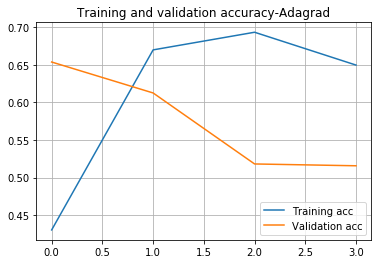

<Figure size 432x288 with 0 Axes>

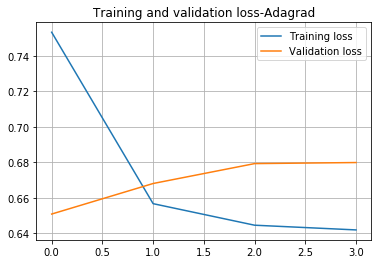

In [54]:
# plot result
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy-Adagrad')
plt.legend()
plt.grid()
plt.figure()
plt.show()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss-Adagrad')
plt.grid()
plt.legend()
plt.show() 



##### __ResNet + RMSprop:__

In [55]:
resnet_model = Sequential()

resnet_model.add(pretrained_model)
resnet_model.add(Flatten(input_shape=pretrained_model.output_shape[1:]))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))

resnet_model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
resnet_model.summary()


earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                   
                              verbose=1)
                              
early_stop=[earlyStopping]

resnet_RMSprop = resnet_model.fit(train_data,train_labels, batch_size=64, epochs=20, callbacks=early_stop, validation_split=.25)

acc = resnet_RMSprop.history['accuracy']
val_acc = resnet_RMSprop.history['val_accuracy']
loss = resnet_RMSprop.history['loss']
val_loss = resnet_RMSprop.history['val_loss']
epochs = range(len(acc)) 

df_result.append(pd.DataFrame({'model':'ResNet','optimizer': 'RMSprop', 'epochs': epochs,'tr_accu': acc,'val_accu': val_acc,'tr_loss': loss,'val_loss': val_loss}))

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_10 (Flatten)        (None, 2048)              0         
                                                                 
 dense_30 (Dense)            (None, 256)               524544    
                                                                 
 dense_31 (Dense)            (None, 2)                 514       
                                                                 
Total params: 24,112,770
Trainable params: 525,058
Non-trainable params: 23,587,712
_________________________________________________________________
Epoch 1/20
20/20 [==============================] - 208s 10s/step - loss: 0.9337 - accuracy: 0.5647 - val_loss: 0.8548 - val_accuracy: 0.4964
Epoch 2/20
20/20 [=======

,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,vgg16,Adagrad,0,0.516181,0.438257,0.714975,0.725494
1,vgg16,Adagrad,1,0.572006,0.714286,0.681500,0.675234
2,vgg16,Adagrad,2,0.590615,0.561743,0.683741,0.666838
3,vgg16,Adagrad,3,0.580097,0.438257,0.674588,0.758979
4,vgg16,Adagrad,4,0.607605,0.438257,0.673309,0.762532
5,vgg16,Adagrad,5,0.584142,0.438257,0.668827,0.781976
6,vgg16,Adagrad,6,0.610032,0.443099,0.664667,0.699842
7,vgg16,Adam,0,0.550162,0.506053,0.767247,0.683573
8,vgg16,Adam,1,0.613269,0.506053,0.659116,0.685625
9,vgg16,Adam,2,0.620550,0.721550,0.658077,0.618821


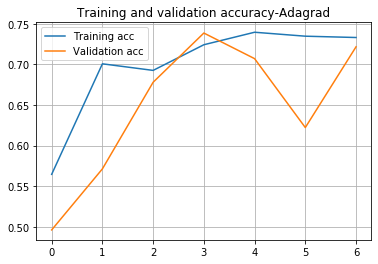

<Figure size 432x288 with 0 Axes>

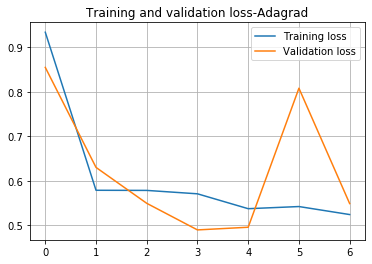

In [56]:
# plot result
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy-Adagrad')
plt.legend()
plt.grid()
plt.figure()
plt.show()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss-Adagrad')
plt.grid()
plt.legend()
plt.show() 


##### __ResNet + Adagrad:__

In [58]:
resnet_model = Sequential()
resnet_model.add(pretrained_model)

resnet_model.add(Flatten(input_shape=pretrained_model.output_shape[1:]))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(20, activation='relu'))
resnet_model.add(Dense(15, activation='relu'))

resnet_model.add(Dense(output_, activation='softmax'))


resnet_model.compile(optimizer=optimizers.Adagrad(lr=1e-4),loss='categorical_crossentropy',metrics=['accuracy'])
resnet_model.summary()


earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                   
                              verbose=1)
                              
early_stop=[earlyStopping]

resnet_Adagrad = resnet_model.fit(train_data,train_labels, batch_size=64, epochs=20, callbacks=early_stop, validation_split=.25)

acc = resnet_Adagrad.history['accuracy']
val_acc = resnet_Adagrad.history['val_accuracy']
loss = resnet_Adagrad.history['loss']
val_loss = resnet_Adagrad.history['val_loss']
epochs = range(len(acc)) 

df_result.append(pd.DataFrame({'model':'ResNet','optimizer': 'Adagrad', 'epochs': epochs,'tr_accu': acc,'val_accu': val_acc,'tr_loss': loss,'val_loss': val_loss}))

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_11 (Flatten)        (None, 2048)              0         
                                                                 
 dense_32 (Dense)            (None, 256)               524544    
                                                                 
 dense_33 (Dense)            (None, 20)                5140      
                                                                 
 dense_34 (Dense)            (None, 15)                315       
                                                                 
 dense_35 (Dense)            (None, 2)                 32        
                                                                 
Total params: 24,117,743
Trainable params: 530,031
No

,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,vgg16,Adagrad,0,0.516181,0.438257,0.714975,0.725494
1,vgg16,Adagrad,1,0.572006,0.714286,0.681500,0.675234
2,vgg16,Adagrad,2,0.590615,0.561743,0.683741,0.666838
3,vgg16,Adagrad,3,0.580097,0.438257,0.674588,0.758979
4,vgg16,Adagrad,4,0.607605,0.438257,0.673309,0.762532
5,vgg16,Adagrad,5,0.584142,0.438257,0.668827,0.781976
6,vgg16,Adagrad,6,0.610032,0.443099,0.664667,0.699842
7,vgg16,Adam,0,0.550162,0.506053,0.767247,0.683573
8,vgg16,Adam,1,0.613269,0.506053,0.659116,0.685625
9,vgg16,Adam,2,0.620550,0.721550,0.658077,0.618821


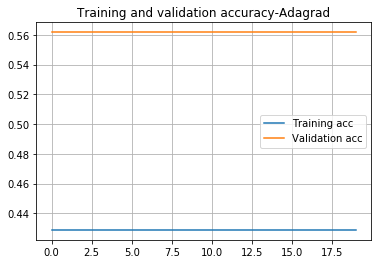

<Figure size 432x288 with 0 Axes>

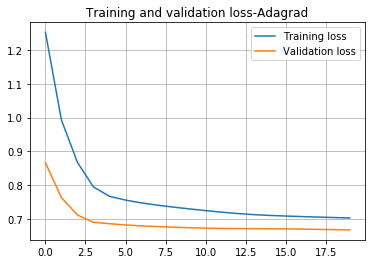

In [59]:
# plot result
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy-Adagrad')
plt.legend()
plt.grid()
plt.figure()
plt.show()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss-Adagrad')
plt.grid()
plt.legend()
plt.show() 



In [60]:
# store resnet results

# add adam results
epochs = range(len(resnet_adam.history['accuracy']))

for row in epochs:
    df_result.loc[len(df_result.index)] = ['resnet', 'Adam', epochs[row], resnet_adam.history['accuracy'][row], resnet_adam.history['val_accuracy'][row], 
resnet_adam.history['loss'][row], resnet_adam.history['val_loss'][row]]

# add sgd results
epochs = range(len(resnet_sgd.history['accuracy'])) 

for row in epochs:
    df_result.loc[len(df_result.index)] = ['resnet', 'Sgd', epochs[row], resnet_sgd.history['accuracy'][row], resnet_sgd.history['val_accuracy'][row], 
resnet_sgd.history['loss'][row], resnet_sgd.history['val_loss'][row]]


# add RMSprop results
epochs = range(len(resnet_RMSprop.history['accuracy'])) 

for row in epochs:
    df_result.loc[len(df_result.index)] = ['resnet', 'RMSprop', epochs[row], resnet_RMSprop.history['accuracy'][row], resnet_RMSprop.history['val_accuracy'][row], 
resnet_RMSprop.history['loss'][row], resnet_RMSprop.history['val_loss'][row]]


# add Adagrad results
epochs = range(len(resnet_Adagrad.history['accuracy'])) 

for row in epochs:
    df_result.loc[len(df_result.index)] = ['resnet', 'Adagrad', epochs[row], resnet_Adagrad.history['accuracy'][row], resnet_Adagrad.history['val_accuracy'][row], 
resnet_Adagrad.history['loss'][row], resnet_Adagrad.history['val_loss'][row]]

df_result

,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,vgg16,Adagrad,0,0.516181,0.438257,0.714975,0.725494
1,vgg16,Adagrad,1,0.572006,0.714286,0.681500,0.675234
2,vgg16,Adagrad,2,0.590615,0.561743,0.683741,0.666838
3,vgg16,Adagrad,3,0.580097,0.438257,0.674588,0.758979
4,vgg16,Adagrad,4,0.607605,0.438257,0.673309,0.762532
...,...,...,...,...,...,...,...
69,resnet,Adagrad,15,0.428803,0.561743,0.708054,0.669941
70,resnet,Adagrad,16,0.428803,0.561743,0.706418,0.669315
71,resnet,Adagrad,17,0.428803,0.561743,0.704955,0.668527
72,resnet,Adagrad,18,0.428803,0.561743,0.703601,0.667824


#### __InceptionV3:__

In [61]:
# Create the base_model
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_)
base_model.trainable = False ## Not trainable weights
data_augmentation = Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])


##### __InceptionV3 + Adam:__

In [62]:
# InceptionV3 + adam

flatten_layer = layers.Flatten(input_shape=base_model.output_shape[1:])
input_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(output_, activation='softmax')

model = Sequential([
    base_model,
    flatten_layer,
    input_1, 
    dense_layer_2,
    prediction_layer
])

# Optimizer : adam
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=0.00001),
              metrics=['accuracy'])


es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

inception_adam = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=es,validation_split=.25)

acc = inception_adam.history['accuracy']
val_acc = inception_adam.history['val_accuracy']
loss = inception_adam.history['loss']
val_loss = inception_adam.history['val_loss']
epochs = range(len(acc)) 

df_result.append(pd.DataFrame({'model':'InceptionV3','optimizer': 'adam', 'epochs': epochs,'tr_accu': acc,'val_accu': val_acc,'tr_loss': loss,'val_loss': val_loss}))

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
20/20 [==============================] - 116s 5s/step - loss: 10.7124 - accuracy: 0.4830 - val_loss: 2.3110 - val_accuracy: 0.5617
Epoch 2/20
20/20 [==============================] - 151s 8s/step - loss: 2.5244 - accuracy: 0.5024 - val_loss: 0.7636 - val_accuracy: 0.5738
Epoch 3/20
20/20 [==============================] - 120s 6s/step - loss: 3.0524 - accuracy: 0.5113 - val_loss: 1.2895 - val_accuracy: 0.5617
Epoch 4/20
20/20 [==============================] - 103s 5s/step - loss: 2.5185 - accuracy: 0.5138 - val_loss: 3.4202 - val_accuracy: 0.5617
Epoch 5/20
20/20 [==============================] - 96s 5s/step - loss: 2.8056 - accuracy: 0.5154 - val_loss: 4.2296 - val_accuracy: 0.4383
Epoch 00005: early stopping


,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,vgg16,Adagrad,0,0.516181,0.438257,0.714975,0.725494
1,vgg16,Adagrad,1,0.572006,0.714286,0.681500,0.675234
2,vgg16,Adagrad,2,0.590615,0.561743,0.683741,0.666838
3,vgg16,Adagrad,3,0.580097,0.438257,0.674588,0.758979
4,vgg16,Adagrad,4,0.607605,0.438257,0.673309,0.762532
...,...,...,...,...,...,...,...
0,InceptionV3,adam,0,0.483010,0.561743,10.712354,2.310987
1,InceptionV3,adam,1,0.502427,0.573850,2.524424,0.763591
2,InceptionV3,adam,2,0.511327,0.561743,3.052439,1.289533
3,InceptionV3,adam,3,0.513754,0.561743,2.518453,3.420209


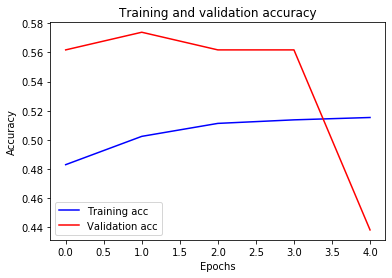

<Figure size 432x288 with 0 Axes>

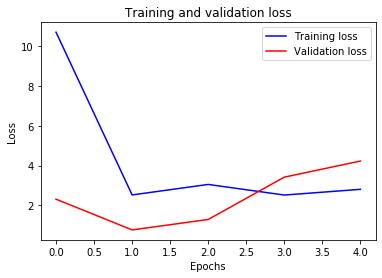

In [63]:
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### __InceptionV3 + SGD:__

In [64]:
# InceptionV3 + SGD

flatten_layer = layers.Flatten(input_shape=base_model.output_shape[1:])
input_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(output_, activation='softmax')

model = Sequential([
    base_model,
    flatten_layer,
    input_1, 
    dense_layer_2,
    prediction_layer
])

# Optimizer : SGD
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=0.0001),
              metrics=['accuracy'])


es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

inception_sgd = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=es,validation_split=.25)

acc = inception_sgd.history['accuracy']
val_acc = inception_sgd.history['val_accuracy']
loss = inception_sgd.history['loss']
val_loss = inception_sgd.history['val_loss']
epochs = range(len(acc)) 

df_result.append(pd.DataFrame({'model':'InceptionV3','optimizer': 'sgd', 'epochs': epochs,'tr_accu': acc,'val_accu': val_acc,'tr_loss': loss,'val_loss': val_loss}))


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
20/20 [==============================] - 117s 5s/step - loss: 78.1644 - accuracy: 0.4838 - val_loss: 0.7376 - val_accuracy: 0.4383
Epoch 2/20
20/20 [==============================] - 93s 5s/step - loss: 0.6875 - accuracy: 0.5712 - val_loss: 0.7100 - val_accuracy: 0.4383
Epoch 3/20
20/20 [==============================] - 92s 5s/step - loss: 0.6856 - accuracy: 0.5631 - val_loss: 0.8119 - val_accuracy: 0.4383
Epoch 4/20
20/20 [==============================] - 99s 5s/step - loss: 0.6885 - accuracy: 0.5534 - val_loss: 0.6890 - val_accuracy: 0.5617
Epoch 5/20
20/20 [==============================] - 94s 5s/step - loss: 0.6917 - accuracy: 0.5518 - val_loss: 0.8032 - val_accuracy: 0.4383
Epoch 6/20
20/20 [==============================] - 92s 5s/step - loss: 0.6940 - accuracy: 0.5599 - val_loss: 0.7461 - val_accuracy: 0.4383
Epoch 7/20
20/20 [==============================] - 92s 5s/step - loss: 0.6875 - accuracy: 0.5599 - val_loss: 0.7455 - val_accuracy: 0.4383
Epoch 00007: early

,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,vgg16,Adagrad,0,0.516181,0.438257,0.714975,0.725494
1,vgg16,Adagrad,1,0.572006,0.714286,0.681500,0.675234
2,vgg16,Adagrad,2,0.590615,0.561743,0.683741,0.666838
3,vgg16,Adagrad,3,0.580097,0.438257,0.674588,0.758979
4,vgg16,Adagrad,4,0.607605,0.438257,0.673309,0.762532
...,...,...,...,...,...,...,...
2,InceptionV3,sgd,2,0.563107,0.438257,0.685587,0.811851
3,InceptionV3,sgd,3,0.553398,0.561743,0.688475,0.688961
4,InceptionV3,sgd,4,0.551780,0.438257,0.691693,0.803168
5,InceptionV3,sgd,5,0.559871,0.438257,0.694049,0.746112


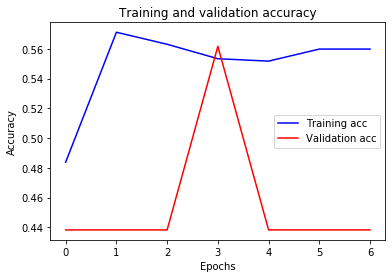

<Figure size 432x288 with 0 Axes>

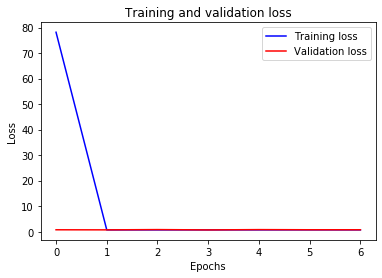

In [65]:

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### __InceptionV3 + RMSprop:__

In [66]:
# InceptionV3 + RMSprop

flatten_layer = layers.Flatten(input_shape=base_model.output_shape[1:])
input_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(output_, activation='softmax')

model = Sequential([
    base_model,
    flatten_layer,
    input_1, 
    dense_layer_2,
    prediction_layer
])

# Optimizer : RMSprop
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=0.0001),
              metrics=['accuracy'])


es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

inception_RMSprop = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=es,validation_split=.25)

acc = inception_RMSprop.history['accuracy']
val_acc = inception_RMSprop.history['val_accuracy']
loss = inception_RMSprop.history['loss']
val_loss = inception_RMSprop.history['val_loss']
epochs = range(len(acc)) 

df_result.append(pd.DataFrame({'model':'InceptionV3','optimizer': 'RMSprop', 'epochs': epochs,'tr_accu': acc,'val_accu': val_acc,'tr_loss': loss,'val_loss': val_loss}))


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
20/20 [==============================] - 111s 5s/step - loss: 32.8435 - accuracy: 0.5016 - val_loss: 25.9307 - val_accuracy: 0.4383
Epoch 2/20
20/20 [==============================] - 99s 5s/step - loss: 10.6166 - accuracy: 0.5049 - val_loss: 0.7720 - val_accuracy: 0.4383
Epoch 3/20
20/20 [==============================] - 95s 5s/step - loss: 2.7298 - accuracy: 0.5097 - val_loss: 0.7651 - val_accuracy: 0.4383
Epoch 4/20
20/20 [==============================] - 1531s 80s/step - loss: 0.8356 - accuracy: 0.5291 - val_loss: 2.0895 - val_accuracy: 0.4383
Epoch 5/20
20/20 [==============================] - 108s 5s/step - loss: 2.4601 - accuracy: 0.5307 - val_loss: 0.6873 - val_accuracy: 0.7167
Epoch 6/20
20/20 [==============================] - 109s 6s/step - loss: 0.7380 - accuracy: 0.5202 - val_loss: 0.6808 - val_accuracy: 0.5617
Epoch 7/20
20/20 [==============================] - 132s 7s/step - loss: 1.1400 - accuracy: 0.5194 - val_loss: 0.6796 - val_accuracy: 0.5617
Epoch 8/20

,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,vgg16,Adagrad,0,0.516181,0.438257,0.714975,0.725494
1,vgg16,Adagrad,1,0.572006,0.714286,0.681500,0.675234
2,vgg16,Adagrad,2,0.590615,0.561743,0.683741,0.666838
3,vgg16,Adagrad,3,0.580097,0.438257,0.674588,0.758979
4,vgg16,Adagrad,4,0.607605,0.438257,0.673309,0.762532
...,...,...,...,...,...,...,...
5,InceptionV3,RMSprop,5,0.520227,0.561743,0.737988,0.680776
6,InceptionV3,RMSprop,6,0.519417,0.561743,1.140030,0.679563
7,InceptionV3,RMSprop,7,0.491909,0.438257,1.448856,1.529997
8,InceptionV3,RMSprop,8,0.508091,0.438257,1.309311,1.766574


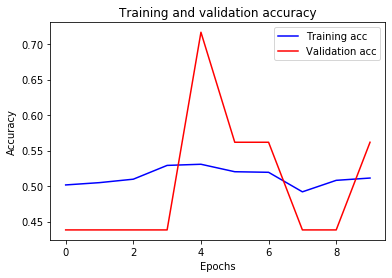

<Figure size 432x288 with 0 Axes>

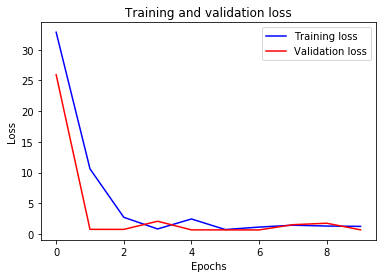

In [67]:

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### __InceptionV3 + Adagrad:__

In [68]:
# InceptionV3 + Adagrad

flatten_layer = layers.Flatten(input_shape=base_model.output_shape[1:])
input_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(output_, activation='softmax')

model = Sequential([
    base_model,
    flatten_layer,
    input_1, 
    dense_layer_2,
    prediction_layer
])

# Optimizer : Adagrad
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adagrad(lr=0.0001),
              metrics=['accuracy'])


es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

inception_Adagrad = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=es,validation_split=.25)

acc = inception_Adagrad.history['accuracy']
val_acc = inception_Adagrad.history['val_accuracy']
loss = inception_Adagrad.history['loss']
val_loss = inception_Adagrad.history['val_loss']
epochs = range(len(acc)) 

df_result.append(pd.DataFrame({'model':'InceptionV3','optimizer': 'Adagrad', 'epochs': epochs,'tr_accu': acc,'val_accu': val_acc,'tr_loss': loss,'val_loss': val_loss}))


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


Epoch 1/20
20/20 [==============================] - 120s 6s/step - loss: 6.8431 - accuracy: 0.5421 - val_loss: 0.7409 - val_accuracy: 0.4383
Epoch 2/20
20/20 [==============================] - 103s 5s/step - loss: 0.6818 - accuracy: 0.5712 - val_loss: 0.6871 - val_accuracy: 0.5617
Epoch 3/20
20/20 [==============================] - 110s 6s/step - loss: 0.6932 - accuracy: 0.5566 - val_loss: 0.7078 - val_accuracy: 0.4383
Epoch 4/20
20/20 [==============================] - 103s 5s/step - loss: 0.6839 - accuracy: 0.5639 - val_loss: 0.6956 - val_accuracy: 0.4479
Epoch 5/20
20/20 [==============================] - 102s 5s/step - loss: 0.6836 - accuracy: 0.5680 - val_loss: 0.7357 - val_accuracy: 0.4383
Epoch 00005: early stopping


,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,vgg16,Adagrad,0,0.516181,0.438257,0.714975,0.725494
1,vgg16,Adagrad,1,0.572006,0.714286,0.681500,0.675234
2,vgg16,Adagrad,2,0.590615,0.561743,0.683741,0.666838
3,vgg16,Adagrad,3,0.580097,0.438257,0.674588,0.758979
4,vgg16,Adagrad,4,0.607605,0.438257,0.673309,0.762532
...,...,...,...,...,...,...,...
0,InceptionV3,Adagrad,0,0.542071,0.438257,6.843098,0.740890
1,InceptionV3,Adagrad,1,0.571197,0.561743,0.681817,0.687115
2,InceptionV3,Adagrad,2,0.556634,0.438257,0.693207,0.707838
3,InceptionV3,Adagrad,3,0.563916,0.447942,0.683851,0.695594


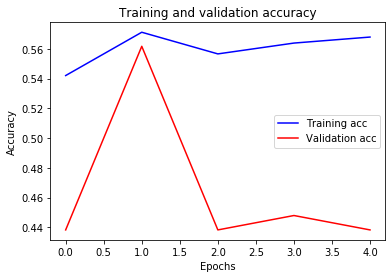

<Figure size 432x288 with 0 Axes>

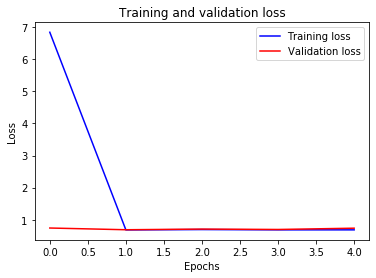

In [69]:

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
# store inception results

# add adam results
epochs = range(len(inception_adam.history['accuracy']))

for row in epochs:
    df_result.loc[len(df_result.index)] = ['inception', 'Adam', epochs[row], inception_adam.history['accuracy'][row], inception_adam.history['val_accuracy'][row], 
inception_adam.history['loss'][row], inception_adam.history['val_loss'][row]]

# add sgd results
epochs = range(len(inception_sgd.history['accuracy'])) 

for row in epochs:
    df_result.loc[len(df_result.index)] = ['inception', 'Sgd', epochs[row], inception_sgd.history['accuracy'][row], inception_sgd.history['val_accuracy'][row], 
inception_sgd.history['loss'][row], inception_sgd.history['val_loss'][row]]


# add RMSprop results
epochs = range(len(inception_RMSprop.history['accuracy'])) 

for row in epochs:
    df_result.loc[len(df_result.index)] = ['inception', 'RMSprop', epochs[row], inception_RMSprop.history['accuracy'][row], inception_RMSprop.history['val_accuracy'][row], 
inception_RMSprop.history['loss'][row], inception_RMSprop.history['val_loss'][row]]


# add Adagrad results
epochs = range(len(inception_Adagrad.history['accuracy'])) 

for row in epochs:
    df_result.loc[len(df_result.index)] = ['inception', 'Adagrad', epochs[row], inception_Adagrad.history['accuracy'][row], inception_Adagrad.history['val_accuracy'][row], 
inception_Adagrad.history['loss'][row], inception_Adagrad.history['val_loss'][row]]

df_result

,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,vgg16,Adagrad,0,0.516181,0.438257,0.714975,0.725494
1,vgg16,Adagrad,1,0.572006,0.714286,0.681500,0.675234
2,vgg16,Adagrad,2,0.590615,0.561743,0.683741,0.666838
3,vgg16,Adagrad,3,0.580097,0.438257,0.674588,0.758979
4,vgg16,Adagrad,4,0.607605,0.438257,0.673309,0.762532
...,...,...,...,...,...,...,...
96,inception,Adagrad,0,0.542071,0.438257,6.843098,0.740890
97,inception,Adagrad,1,0.571197,0.561743,0.681817,0.687115
98,inception,Adagrad,2,0.556634,0.438257,0.693207,0.707838
99,inception,Adagrad,3,0.563916,0.447942,0.683851,0.695594


#### __Xception:__

In [72]:
# Create the base_model
base_model = applications.Xception(weights='imagenet', include_top=False, input_shape=input_)

# freezing layers
base_model.trainable = False ## Not trainable weights

data_augmentation = Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])

##### __Xception + adam:__

In [73]:
# Xception + adam

flatten_layer = layers.Flatten(input_shape=base_model.output_shape[1:])
input_1 = layers.Dense(256, activation='relu')
dropout = layers.Dropout(0.25)
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(output_, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    input_1,
    dropout,
    dense_layer_2,
    prediction_layer
])

# Optimizer : adam
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])


es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

Xception_adam = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=es,validation_split=.25)

acc = Xception_adam.history['accuracy']
val_acc = Xception_adam.history['val_accuracy']
loss = Xception_adam.history['loss']
val_loss = Xception_adam.history['val_loss']

epochs = range(len(acc))

df_result.append(pd.DataFrame({'model':'Xception','optimizer': 'adam', 'epochs': epochs,'tr_accu': acc,'val_accu': val_acc,'tr_loss': loss,'val_loss': val_loss}))


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
20/20 [==============================] - 247s 12s/step - loss: 6.5493 - accuracy: 0.4887 - val_loss: 0.6932 - val_accuracy: 0.4383
Epoch 2/20
20/20 [==============================] - 198s 10s/step - loss: 1.2064 - accuracy: 0.5405 - val_loss: 0.7003 - val_accuracy: 0.4383
Epoch 3/20
20/20 [==============================] - 197s 10s/step - loss: 0.8780 - accuracy: 0.5485 - val_loss: 0.6931 - val_accuracy: 0.4383
Epoch 4/20
20/20 [==============================] - 196s 10s/step - loss: 0.8582 - accuracy: 0.5526 - val_loss: 0.6932 - val_accuracy: 0.4383
Epoch 5/20
20/20 [==============================] - 3090s 162s/step - loss: 0.7906 - accuracy: 0.5502 - val_loss: 0.6932 - val_accuracy: 0.4383
Epoch 6/20
20/20 [==============================] - 1556s 15s/step - loss: 0.8082 - accuracy: 0.5550 - val_loss: 0.6933 - val_accuracy: 0.4383
Epoch 00006: early stopping


,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,vgg16,Adagrad,0,0.516181,0.438257,0.714975,0.725494
1,vgg16,Adagrad,1,0.572006,0.714286,0.681500,0.675234
2,vgg16,Adagrad,2,0.590615,0.561743,0.683741,0.666838
3,vgg16,Adagrad,3,0.580097,0.438257,0.674588,0.758979
4,vgg16,Adagrad,4,0.607605,0.438257,0.673309,0.762532
...,...,...,...,...,...,...,...
1,Xception,adam,1,0.540453,0.438257,1.206408,0.700284
2,Xception,adam,2,0.548544,0.438257,0.878018,0.693149
3,Xception,adam,3,0.552589,0.438257,0.858172,0.693174
4,Xception,adam,4,0.550162,0.438257,0.790614,0.693208


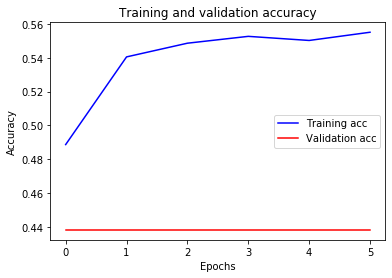

<Figure size 432x288 with 0 Axes>

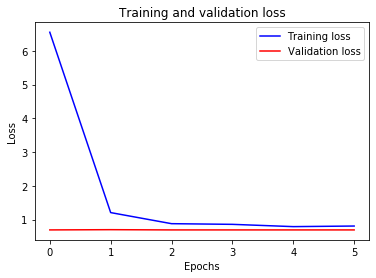

In [74]:
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### __Xception + sgd:__

In [75]:
# Xception + sgd

flatten_layer = layers.Flatten(input_shape=base_model.output_shape[1:])
input_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(output_, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    input_1,
    dense_layer_2,
    prediction_layer
])

# Optimizer : sgd
model.compile(loss='categorical_crossentropy', optimizer=optimizers.SGD(lr=1e-4),
              metrics=['accuracy'])


es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

Xception_sgd = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=es,validation_split=.25)

acc = Xception_sgd.history['accuracy']
val_acc = Xception_sgd.history['val_accuracy']
loss = Xception_sgd.history['loss']
val_loss = Xception_sgd.history['val_loss']

epochs = range(len(acc))

df_result.append(pd.DataFrame({'model':'Xception','optimizer': 'sgd', 'epochs': epochs,'tr_accu': acc,'val_accu': val_acc,'tr_loss': loss,'val_loss': val_loss}))


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
20/20 [==============================] - 320s 16s/step - loss: 13.5859 - accuracy: 0.5032 - val_loss: 1.9472 - val_accuracy: 0.5617
Epoch 2/20
20/20 [==============================] - 2624s 137s/step - loss: 7.5211 - accuracy: 0.4919 - val_loss: 5.7489 - val_accuracy: 0.4383
Epoch 3/20
20/20 [==============================] - 7212s 379s/step - loss: 3.9407 - accuracy: 0.5453 - val_loss: 6.5142 - val_accuracy: 0.4383
Epoch 4/20
20/20 [==============================] - 977s 51s/step - loss: 3.8108 - accuracy: 0.4951 - val_loss: 6.5866 - val_accuracy: 0.4383
Epoch 00004: early stopping


,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,vgg16,Adagrad,0,0.516181,0.438257,0.714975,0.725494
1,vgg16,Adagrad,1,0.572006,0.714286,0.681500,0.675234
2,vgg16,Adagrad,2,0.590615,0.561743,0.683741,0.666838
3,vgg16,Adagrad,3,0.580097,0.438257,0.674588,0.758979
4,vgg16,Adagrad,4,0.607605,0.438257,0.673309,0.762532
...,...,...,...,...,...,...,...
100,inception,Adagrad,4,0.567961,0.438257,0.683552,0.735694
0,Xception,sgd,0,0.503236,0.561743,13.585889,1.947199
1,Xception,sgd,1,0.491909,0.438257,7.521085,5.748858
2,Xception,sgd,2,0.545307,0.438257,3.940743,6.514248


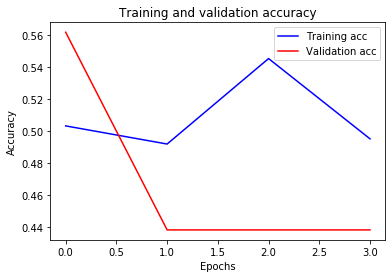

<Figure size 432x288 with 0 Axes>

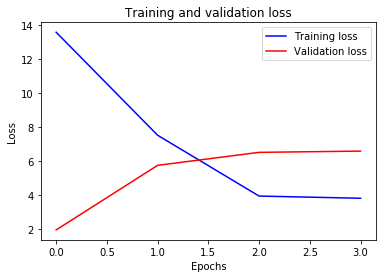

In [76]:

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### __Xception + RMSprop:__

In [77]:
# Xception + RMSprop

flatten_layer = layers.Flatten(input_shape=base_model.output_shape[1:])
input_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(output_, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    input_1,
    dense_layer_2,
    prediction_layer
])

# Optimizer : RMSprop
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])


es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

Xception_RMSprop = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=es,validation_split=.25)

acc = Xception_RMSprop.history['accuracy']
val_acc = Xception_RMSprop.history['val_accuracy']
loss = Xception_RMSprop.history['loss']
val_loss = Xception_RMSprop.history['val_loss']

epochs = range(len(acc))

df_result.append(pd.DataFrame({'model':'Xception','optimizer': 'RMSprop', 'epochs': epochs,'tr_accu': acc,'val_accu': val_acc,'tr_loss': loss,'val_loss': val_loss}))



/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/20
20/20 [==============================] - 336s 17s/step - loss: 9.0033 - accuracy: 0.5049 - val_loss: 10.7278 - val_accuracy: 0.4383
Epoch 2/20
20/20 [==============================] - 298s 15s/step - loss: 5.6078 - accuracy: 0.5129 - val_loss: 5.8087 - val_accuracy: 0.5617
Epoch 3/20
20/20 [==============================] - 305s 15s/step - loss: 5.6073 - accuracy: 0.5057 - val_loss: 0.7649 - val_accuracy: 0.5617
Epoch 4/20
20/20 [==============================] - 388s 20s/step - loss: 5.7202 - accuracy: 0.4984 - val_loss: 6.8787 - val_accuracy: 0.4383
Epoch 5/20
20/20 [==============================] - 475s 24s/step - loss: 5.9631 - accuracy: 0.4612 - val_loss: 5.3765 - val_accuracy: 0.4383
Epoch 6/20
20/20 [==============================] - 549s 28s/step - loss: 5.3490 - accuracy: 0.5016 - val_loss: 3.8512 - val_accuracy: 0.4383
Epoch 00006: early stopping


,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,vgg16,Adagrad,0,0.516181,0.438257,0.714975,0.725494
1,vgg16,Adagrad,1,0.572006,0.714286,0.681500,0.675234
2,vgg16,Adagrad,2,0.590615,0.561743,0.683741,0.666838
3,vgg16,Adagrad,3,0.580097,0.438257,0.674588,0.758979
4,vgg16,Adagrad,4,0.607605,0.438257,0.673309,0.762532
...,...,...,...,...,...,...,...
1,Xception,RMSprop,1,0.512945,0.561743,5.607823,5.808692
2,Xception,RMSprop,2,0.505663,0.561743,5.607328,0.764872
3,Xception,RMSprop,3,0.498382,0.438257,5.720185,6.878749
4,Xception,RMSprop,4,0.461165,0.438257,5.963053,5.376468


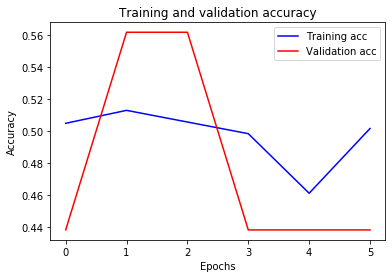

<Figure size 432x288 with 0 Axes>

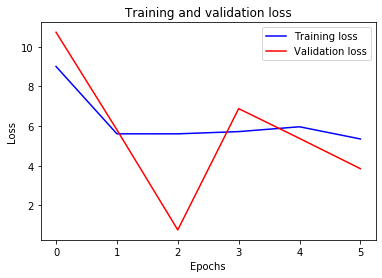

In [78]:

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### __Xception + Adagrad:__

In [79]:
# Xception + Adagrad

flatten_layer = layers.Flatten(input_shape=base_model.output_shape[1:])
input_1 = layers.Dense(256, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(output_, activation='softmax')

model = models.Sequential([
    base_model,
    flatten_layer,
    input_1,
    dense_layer_2,
    prediction_layer
])

# Optimizer : Adagrad
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adagrad(lr=1e-4),
              metrics=['accuracy'])


es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

Xception_Adagrad = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=es,validation_split=.25)

acc = Xception_Adagrad.history['accuracy']
val_acc = Xception_Adagrad.history['val_accuracy']
loss = Xception_Adagrad.history['loss']
val_loss = Xception_Adagrad.history['val_loss']

epochs = range(len(acc))

df_result.append(pd.DataFrame({'model':'Xception','optimizer': 'Adagrad', 'epochs': epochs,'tr_accu': acc,'val_accu': val_acc,'tr_loss': loss,'val_loss': val_loss}))


/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)


Epoch 1/20
20/20 [==============================] - 733s 36s/step - loss: 1.9033 - accuracy: 0.4976 - val_loss: 0.6822 - val_accuracy: 0.5617
Epoch 2/20
20/20 [==============================] - 8637s 452s/step - loss: 0.8023 - accuracy: 0.4806 - val_loss: 1.0803 - val_accuracy: 0.4383
Epoch 3/20
20/20 [==============================] - 8001s 421s/step - loss: 0.7419 - accuracy: 0.5477 - val_loss: 0.6873 - val_accuracy: 0.5617
Epoch 4/20
20/20 [==============================] - 296s 15s/step - loss: 0.7011 - accuracy: 0.5453 - val_loss: 0.7437 - val_accuracy: 0.4383
Epoch 00004: early stopping


,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,vgg16,Adagrad,0,0.516181,0.438257,0.714975,0.725494
1,vgg16,Adagrad,1,0.572006,0.714286,0.681500,0.675234
2,vgg16,Adagrad,2,0.590615,0.561743,0.683741,0.666838
3,vgg16,Adagrad,3,0.580097,0.438257,0.674588,0.758979
4,vgg16,Adagrad,4,0.607605,0.438257,0.673309,0.762532
...,...,...,...,...,...,...,...
100,inception,Adagrad,4,0.567961,0.438257,0.683552,0.735694
0,Xception,Adagrad,0,0.497573,0.561743,1.903332,0.682233
1,Xception,Adagrad,1,0.480583,0.438257,0.802258,1.080262
2,Xception,Adagrad,2,0.547735,0.561743,0.741899,0.687282


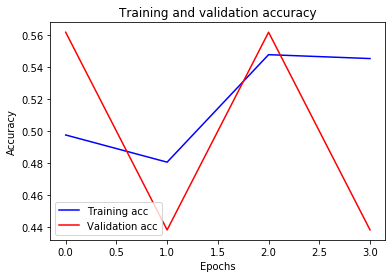

<Figure size 432x288 with 0 Axes>

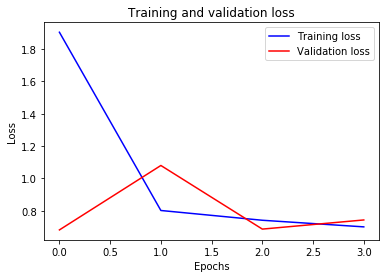

In [80]:

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [81]:
# store Xception results

# add adam results
epochs = range(len(Xception_adam.history['accuracy']))

for row in epochs:
    df_result.loc[len(df_result.index)] = ['Xception', 'Adam', epochs[row], Xception_adam.history['accuracy'][row], Xception_adam.history['val_accuracy'][row], 
Xception_adam.history['loss'][row], Xception_adam.history['val_loss'][row]]

# add sgd results
epochs = range(len(Xception_sgd.history['accuracy'])) 

for row in epochs:
    df_result.loc[len(df_result.index)] = ['Xception', 'Sgd', epochs[row], Xception_sgd.history['accuracy'][row], Xception_sgd.history['val_accuracy'][row], 
Xception_sgd.history['loss'][row], Xception_sgd.history['val_loss'][row]]


# add RMSprop results
epochs = range(len(Xception_RMSprop.history['accuracy'])) 

for row in epochs:
    df_result.loc[len(df_result.index)] = ['Xception', 'RMSprop', epochs[row], Xception_RMSprop.history['accuracy'][row], Xception_RMSprop.history['val_accuracy'][row], 
Xception_RMSprop.history['loss'][row], Xception_RMSprop.history['val_loss'][row]]


# add Adagrad results
epochs = range(len(Xception_Adagrad.history['accuracy'])) 

for row in epochs:
    df_result.loc[len(df_result.index)] = ['Xception', 'Adagrad', epochs[row], Xception_Adagrad.history['accuracy'][row], Xception_Adagrad.history['val_accuracy'][row], 
Xception_Adagrad.history['loss'][row], Xception_Adagrad.history['val_loss'][row]]

df_result

,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,vgg16,Adagrad,0,0.516181,0.438257,0.714975,0.725494
1,vgg16,Adagrad,1,0.572006,0.714286,0.681500,0.675234
2,vgg16,Adagrad,2,0.590615,0.561743,0.683741,0.666838
3,vgg16,Adagrad,3,0.580097,0.438257,0.674588,0.758979
4,vgg16,Adagrad,4,0.607605,0.438257,0.673309,0.762532
...,...,...,...,...,...,...,...
116,Xception,RMSprop,5,0.501618,0.438257,5.348958,3.851239
117,Xception,Adagrad,0,0.497573,0.561743,1.903332,0.682233
118,Xception,Adagrad,1,0.480583,0.438257,0.802258,1.080262
119,Xception,Adagrad,2,0.547735,0.561743,0.741899,0.687282


#### __Store results of models:__

In [82]:
# Save the dataset result
df_result.to_csv("data/df_result.csv")

### __Un-Freezing layers of models:__

In [ ]:
df_result = pd.DataFrame(columns=['model','optimizer','epochs','tr_accu','val_accu','tr_loss','val_loss'])

#### __VGG16 + Adam:__

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16_input (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,137,986
Trainable params: 21,137,986
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
20/20 [==============================]

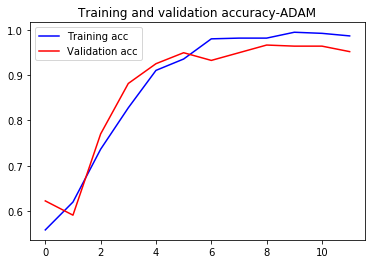

<Figure size 432x288 with 0 Axes>

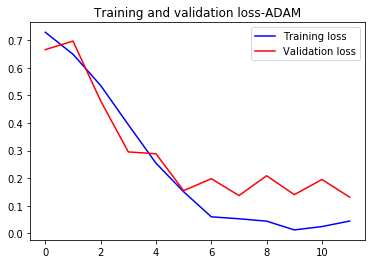

In [18]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

es = EarlyStopping(monitor='val_accuracy', mode='max', patience=3,  restore_best_weights=True)

vgg16_adam= model.fit(train_data, train_labels, epochs=20, validation_split=0.25, batch_size=BS, callbacks=[es])

acc = vgg16_adam.history['accuracy']
val_acc = vgg16_adam.history['val_accuracy']
loss = vgg16_adam.history['loss']
val_loss = vgg16_adam.history['val_loss']
epochs = range(len(acc))



plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy-ADAM')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss-ADAM')
plt.legend()
plt.show()

In [28]:
vgg16_model = model

In [19]:
model.save('vgg16_adam_model.h5')

In [21]:
# add adam results
epochs = range(len(vgg16_adam.history['accuracy']))

for row in epochs:
    df_result.loc[len(df_result.index)] = ['vgg16', 'Adam', epochs[row], vgg16_adam.history['accuracy'][row], vgg16_adam.history['val_accuracy'][row], 
vgg16_adam.history['loss'][row], vgg16_adam.history['val_loss'][row]]

#### __InceptionV3 + Adam:__

In [ ]:
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
# Optimizer : adam
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

inception_adam = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=es,validation_split=.25)

acc = inception_adam.history['accuracy']
val_acc = inception_adam.history['val_accuracy']
loss = inception_adam.history['loss']
val_loss = inception_adam.history['val_loss']
epochs = range(len(acc)) 


plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
# add adam results
epochs = range(len(inception_adam.history['accuracy']))

for row in epochs:
    df_result.loc[len(df_result.index)] = ['inception', 'Adam', epochs[row], inception_adam.history['accuracy'][row], inception_adam.history['val_accuracy'][row], 
inception_adam.history['loss'][row], inception_adam.history['val_loss'][row]]

In [ ]:
inception_model = model
inception_model.save('inception_adam_model.h5')

#### __InceptionV3 + RMSprop:__

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3_input (InputLa  [(None, 224, 224, 3)]    0         
 yer)                                                            
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               13107456  
                                                                 
 dense_7 (Dense)             (None, 2)                 514       
                                                                 
Total params: 34,910,754
Trainable params: 34,876,322
Non-trainable params: 34,432
__________________________________________

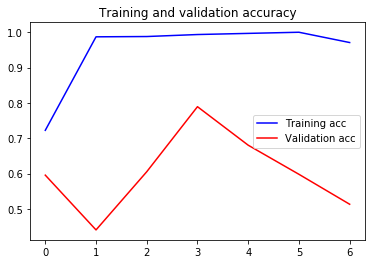

<Figure size 432x288 with 0 Axes>

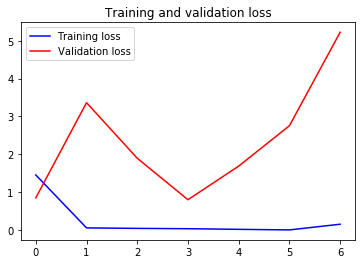

In [49]:
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
# Optimizer : RMSprop
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

es = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

inception_RMSprop = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=es,validation_split=.25)

acc = inception_RMSprop.history['accuracy']
val_acc = inception_RMSprop.history['val_accuracy']
loss = inception_RMSprop.history['loss']
val_loss = inception_RMSprop.history['val_loss']
epochs = range(len(acc)) 


plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [50]:
# add adam results
epochs = range(len(inception_RMSprop.history['accuracy']))

for row in epochs:
    df_result.loc[len(df_result.index)] = ['inception', 'RMSprop', epochs[row], inception_RMSprop.history['accuracy'][row], inception_RMSprop.history['val_accuracy'][row], 
inception_RMSprop.history['loss'][row], inception_RMSprop.history['val_loss'][row]]

In [45]:
inception_model = model
inception_model.save('inception_RMSprop_model.h5')

#### __ResNet50 + Adam:__

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50_input (InputLayer)  [(None, 224, 224, 3)]    0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 256)               25690368  
                                                                 
 dense_5 (Dense)             (None, 2)                 514       
                                                                 
Total params: 49,278,594
Trainable params: 49,225,474
Non-trainable params: 53,120
_________________________________________________________________
Epoch 1/20
20/20 [========================

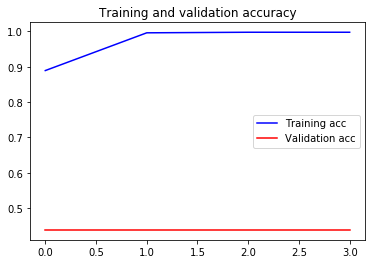

<Figure size 432x288 with 0 Axes>

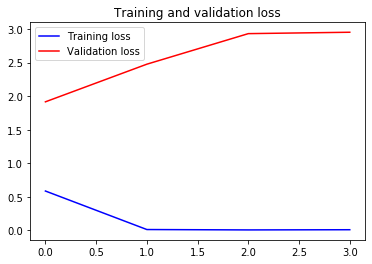

In [46]:
base_model = applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_)

model = Sequential()
data_augmentation = keras.Sequential([layers.experimental.preprocessing.RandomRotation(0.1)])
model.add(base_model)
model.add(Flatten(input_shape=base_model.output_shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_, activation='softmax'))

model = Model(inputs=model.input, outputs=model.output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

model.summary()

resnet_adam = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=es,validation_split=.25)

acc = resnet_adam.history['accuracy']
val_acc = resnet_adam.history['val_accuracy']
loss = resnet_adam.history['loss']
val_loss = resnet_adam.history['val_loss']
epochs = range(len(acc)) 


plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [47]:
# add adam results
epochs = range(len(resnet_adam.history['accuracy']))

for row in epochs:
    df_result.loc[len(df_result.index)] = ['ResNet50', 'Adam', epochs[row], resnet_adam.history['accuracy'][row], resnet_adam.history['val_accuracy'][row], 
resnet_adam.history['loss'][row], resnet_adam.history['val_loss'][row]]

In [48]:
resnet_model = model
resnet_model.save('ResNet50_adam_model.h5')

/Users/RAHAF/opt/anaconda3/lib/python3.8/site-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


#### __Store results of models:__

In [ ]:
# Save the dataset result
df_result.to_csv("data/df_result_final.csv")

### __Visualize Results:__

#### __Frozen layers:__

In [55]:
df_result = pd.read_csv('data/df_result.csv')
df_result.head(10)

,Unnamed: 0,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,0,vgg16,Adagrad,0,0.516181,0.438257,0.714975,0.725494
1,1,vgg16,Adagrad,1,0.572006,0.714286,0.681500,0.675234
2,2,vgg16,Adagrad,2,0.590615,0.561743,0.683741,0.666838
3,3,vgg16,Adagrad,3,0.580097,0.438257,0.674588,0.758979
4,4,vgg16,Adagrad,4,0.607605,0.438257,0.673309,0.762532
5,5,vgg16,Adagrad,5,0.584142,0.438257,0.668827,0.781976
6,6,vgg16,Adagrad,6,0.610032,0.443099,0.664667,0.699842
7,7,vgg16,Adam,0,0.550162,0.506053,0.767247,0.683573
8,8,vgg16,Adam,1,0.613269,0.506053,0.659116,0.685625
9,9,vgg16,Adam,2,0.620550,0.721550,0.658077,0.618821


Text(0.5, 0.98, 'Validation Accuracy of Pre-trained Models (frozen layers).')

<Figure size 1800x1080 with 0 Axes>

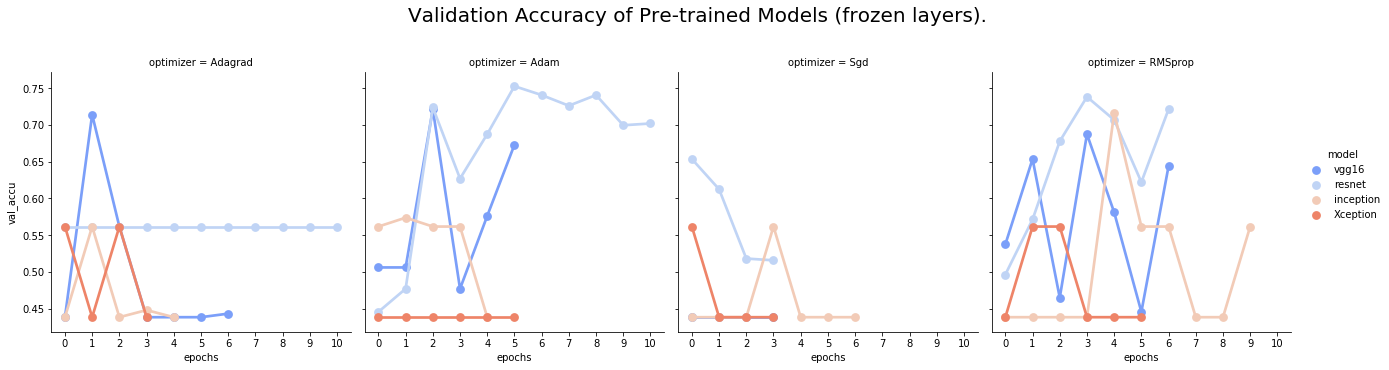

In [75]:
plt.figure(figsize = (25,15))
ax = sns.catplot(x="epochs", y="val_accu", hue="model",
            col="optimizer", aspect=.9,
            kind="point", palette='coolwarm', data=df_result[ df_result.epochs < 11]);

ax.fig.subplots_adjust(top=0.8) # adjust the Figure in ax
ax.fig.suptitle('Validation Accuracy of Pre-trained Models (frozen layers).', size=20)

Text(0.5, 0.98, 'Validation Loss of Pre-trained Models(frozen layers)')

<Figure size 1800x1080 with 0 Axes>

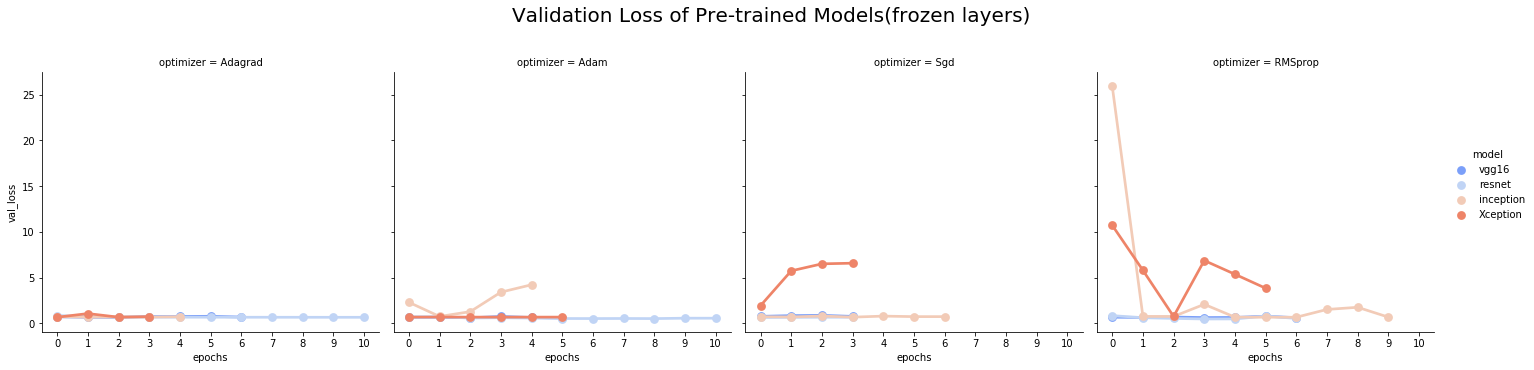

In [76]:
plt.figure(figsize = (25,15))
ax = sns.catplot(x="epochs", y="val_loss", hue="model",
            col="optimizer", aspect=1,
            kind="point", palette='coolwarm', data=df_result[ df_result.epochs < 11]);
ax.fig.subplots_adjust(top=0.8) # adjust the Figure in ax
ax.fig.suptitle('Validation Loss of Pre-trained Models(frozen layers)', size=20)

#### __Un-Frozen layers:__

In [57]:
df_result_final = pd.read_csv('data/df_result_final.csv')
df_result_final.head(10)

,Unnamed: 0,model,optimizer,epochs,tr_accu,val_accu,tr_loss,val_loss
0,0,vgg16,Adam,0,0.558252,0.622276,0.729110,0.666083
1,1,vgg16,Adam,1,0.619741,0.590799,0.649491,0.697068
2,2,vgg16,Adam,2,0.736246,0.769976,0.536285,0.480628
3,3,vgg16,Adam,3,0.827670,0.881356,0.394188,0.295403
4,4,vgg16,Adam,4,0.910194,0.924939,0.254693,0.288767
5,5,vgg16,Adam,5,0.935275,0.949153,0.151017,0.154992
6,6,vgg16,Adam,6,0.979773,0.932203,0.060216,0.198432
7,7,vgg16,Adam,7,0.981392,0.949153,0.053149,0.137211
8,8,vgg16,Adam,8,0.981392,0.966102,0.044469,0.209107
9,9,vgg16,Adam,9,0.994337,0.963680,0.012763,0.140581


Text(0.5, 0.98, 'Validation Accuracy of Pre-trained Models (Un-frozen layers).')

<Figure size 1800x1080 with 0 Axes>

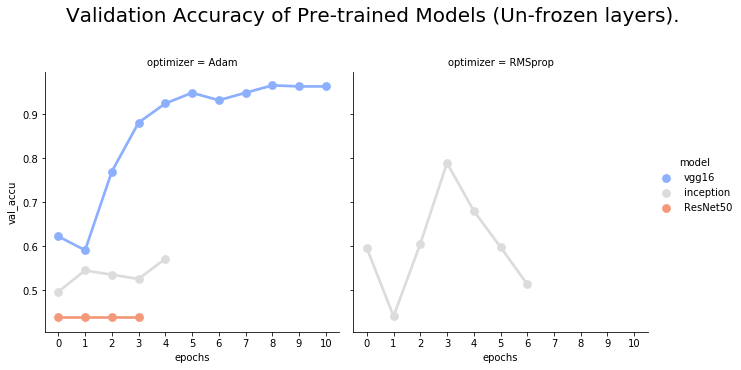

In [77]:
plt.figure(figsize = (25,15))
ax = sns.catplot(x="epochs", y="val_accu", hue="model",
            col="optimizer", aspect=.9,
            kind="point", palette='coolwarm', data=df_result_final[ df_result_final.epochs < 11]);
ax.fig.subplots_adjust(top=0.8) # adjust the Figure in ax
ax.fig.suptitle('Validation Accuracy of Pre-trained Models (Un-frozen layers).', size=20)

Text(0.5, 0.98, 'Validation Loss of Pre-trained Models (Un-frozen layers)')

<Figure size 1800x1080 with 0 Axes>

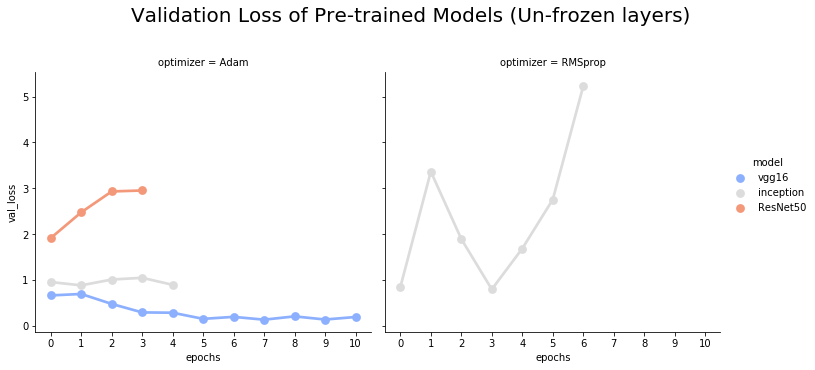

In [78]:
plt.figure(figsize = (25,15))
ax = sns.catplot(x="epochs", y="val_loss", hue="model",
            col="optimizer", aspect=1,
            kind="point", palette='coolwarm', data=df_result_final[ df_result_final.epochs < 11]);
ax.fig.subplots_adjust(top=0.8) # adjust the Figure in ax
ax.fig.suptitle('Validation Loss of Pre-trained Models (Un-frozen layers)', size=20)

## <hr>

## __Classification:__

- Compute confusion matrix after selecting the best models based on accuracy, which is **VGG16** model with **Adam** optimizer without freezing.

In [62]:
# Get the best model
model = load_model('vgg16_adam_model.h5')

y_prob = model.predict(test_data)

# Convert probabiites into label
y_label = y_prob.argmax(axis=-1)
y_label


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       252
           1       1.00      0.99      0.99       248

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500





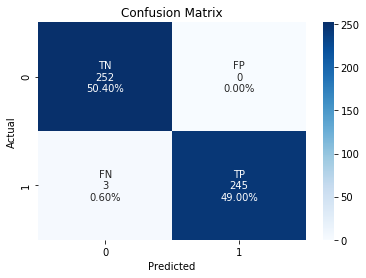

In [63]:
# # print classification report
print(classification_report(test_labels, y_label))
print('\n')
matrix = confusion_matrix(test_labels, y_label)

# plot confusion
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues');
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('Actual');

- Predict particular image from test data.

In [64]:
def convert_label_to_text(label=0):
    """
        Convert label into text
        
        Arguments:
            label: int
        Returns:
            str: The mapping
    """
    return "Forged!" if label == 1 else "Real."

In [65]:
# read image
img = cv2.imread('data/sign_data/Dataset/test/049/01_049.png')
# to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# resize img
img = cv2.resize(img, (SIZE,SIZE))
# normalize img from 0-255 to 0-1
img = img/255.0

img = np.expand_dims(img, axis=0)

y_prob = model.predict(img)
y_label = y_prob.argmax(axis=-1)

print( convert_label_to_text(y_label) )

Real.


## <hr>

## __Visualization:__

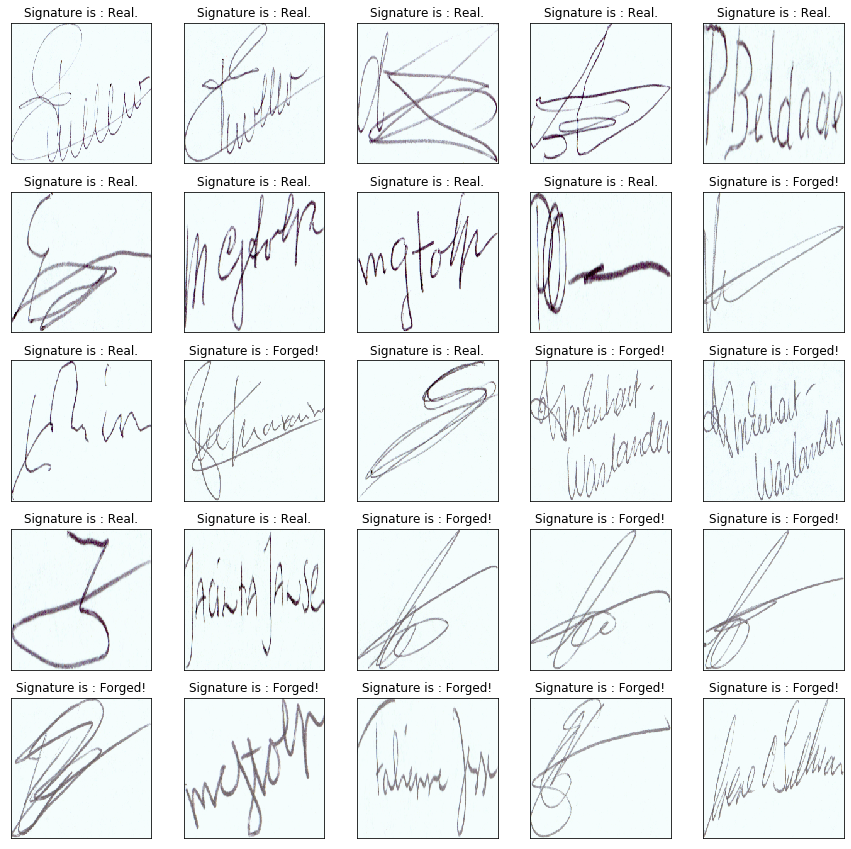

In [139]:

plt.figure(figsize = (15,15))
for i in range(0,25):
    #initializing subplot of 5x5
    plt.subplot(5,5, i+1)
    #display images in the subplots
    plt.imshow(train_data[i*10], cmap=plt.cm.gray_r, interpolation='nearest')
    #set title for each subplot
    if train_labels[i*10][0] == 0:
        plt.title("Signature is : Real." )
    else:
        plt.title("Signature is : Forged!" )
    #get current axes
    ax = plt.gca()

    #hide x-axis
    ax.get_xaxis().set_visible(False)

    #hide y-axis 
    ax.get_yaxis().set_visible(False)

#display the plot
plt.show()